# The Bisection Algorithm

The Bisection Algorithm is a method of approximating the root of a function. The algorithm does this for a given function $f(x)$ and given range of lower bound $l$ and uppper bound $u$ such that $f(l)$ and $f(u)$ have opposite signs. The algorithm calculates the midpoint $m$ of the range $(l,u)$ and from there the algorithm compares the midpoint to the upper and lower bounds. If $f(m)$ and $f(l)$ have opposite signs, the algorithm then constructs a new range with the same lower bound $l$ and new upper bound $m$. If not, the algorithm will construct a different range of lower bound $m$ and upper bound $u$. If a root of $f(x)$ is within the range of $l$ and $u$ then the algorithm will be repeated till it converges to that root. If there is no root of $f(x)$ in the range of $l$ and $u$ then the algorithm will instead converge to the midpoint of $l$ and $u$.

Here is an example of code using the bisection algortihim to calculate the root of the function $f(x) = x^2 - 4$:

In [84]:
def bisection_step(f, bounds):
    
    # Function to perform a single step of the Bisection Algorithm
    
    lower, upper = bounds[0] ,bounds[1] # sets lower and upper bounds as separate variables
    middle = (lower + upper)/2 # Calculation of the midpoint m
    
    if f(lower)*f(middle)<0: # check for if f(l) and f(m) have opposite signs. If True, constucts new range of (l,m)
        return (lower, middle)
    else:
        return (middle, upper) # If f(l) and f(m) do not have opposite signs, new range of (m,u) is constructed 

In [85]:
def f(x): return x**2 - 4 # Defining our example function f(x)

In [86]:
print("{:^15}  {:^15}  {:^15}".format("lower", "upper", "difference")) 

l, u, n = 0, 5, 0 # defining range (l,u), n is a variable used to count how many iterations the algorithm goes through

while abs(u-l) > 10**(-8):
    # This is a loop designed to repeat the bisection_step function till it approxiamtely coverges to a root with decent precison   
    
    n = n + 1
    # adds 1 to the iteration count
    
    l, u = bisection_step(f, (l, u)) 
    # Performs a single step of the bisection algorithm for a given function and range and outputs the new range
    
    
print("{:15.12f}  {:15.12f}  {:15.12f}".format(l, u, u-l)) 
#This format string prints out the values for lower, upper and their difference each with width 15 characters and 12 decimal places 

print('') # prints a blank line for presentation purposes

print('Total number of iterations:', n) # Shows the total number of iterations

     lower            upper         difference   
 1.999999992549   2.000000001863   0.000000009313

Total number of iterations: 29


The roots of $f(x)$ are $\pm2$. From our code we can see the Bisection Algorithm approximated the root $2$ within the range $(0,5)$ very well as it produced the value $2.000000001863$ and is clearly converging towards $2$.


Whilst the Bisection Algorithm is accurate in approximating roots for $f(x)$, it is not neccessarily applicable to all functions. For example consider a discontinous function $g(x) = tan(x)$

In [87]:
from numpy import tan
def discontinous_g(x): return tan(x) # defining our discontinous function g(x)

In [88]:
print("{:^15}  {:^15}  {:^15}".format("lower", "upper", "difference")) 

l, u, n = 1, 5, 0 # defining range (l,u), n is a variable used to count how many iterations the algorithm goes through

while abs(u-l) > 10**(-8):
    # This is a loop designed to repeat the bisection_step function till it approxiamtely coverges to a root with decent precison   
    
    n = n + 1
    # adds 1 to the iteration count
    
    l, u = bisection_step(discontinous_g, (l, u)) 
    # Performs a single step of the bisection algorithm for a given function and range and outputs the new range
    
    
print("{:15.12f}  {:15.12f}  {:15.12f}".format(l, u, u-l)) 
#This format string prints out the values for lower, upper and their difference each with width 15 characters and 12 decimal places 

print('') # prints a blank line for presentation purposes

print('Total number of iterations:', n) # Shows the total number of iterations

     lower            upper         difference   
 1.570796325803   1.570796333253   0.000000007451

Total number of iterations: 29


The Bisection Algorithm converges towards $1.57$ for range $(1,5)$ which we know for $g(x)$ is an asymptote, not a root. Let's try a different range, for example $(0,5)$:

In [89]:
print("{:^15}  {:^15}  {:^15}".format("lower", "upper", "difference")) 

l, u, n = 0, 5, 0 # defining range (l,u), n is a variable used to count how many iterations the algorithm goes through

while abs(u-l) > 10**(-8):
    # This is a loop designed to repeat the bisection_step function till it approxiamtely coverges to a root with decent precison   
    
    n = n + 1
    # adds 1 to the iteration count
    
    l, u = bisection_step(discontinous_g, (l, u)) 
    # Performs a single step of the bisection algorithm for a given function and range and outputs the new range
    
    
print("{:15.12f}  {:15.12f}  {:15.12f}".format(l, u, u-l)) 
#This format string prints out the values for lower, upper and their difference each with width 15 characters and 12 decimal places 

print('') # prints a blank line for presentation purposes

print('Total number of iterations:', n) # Shows the total number of iterations

     lower            upper         difference   
 3.141592647880   3.141592657194   0.000000009313

Total number of iterations: 29


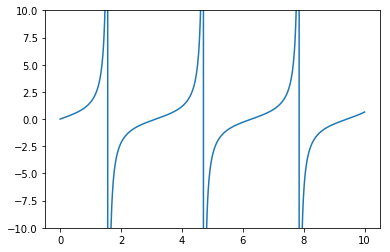

In [15]:
from pylab import plot, linspace, show, ylim
from numpy import tan

x = linspace(0,10,1000)
y = discontinous_g(x)
ylim(-10,10)

plot(x,y)

show()

# Some short code used to plot g(x), limiting x to the range (0,10) and y to the range(-10, 10)

In the range $(0,5)$, the algorithm converges to $3.141$ or $\pi$ which is a root. Hence we can conclude that the Bisection Algortithim is not applicable if the function is discontinuos over the intial range as it will sometimes converge to asymptotes instead of roots. This is due to the fact that the algorithm has been made based on the assumption that there has to be a root in the given range so long as the signs of $f(l)$ and $f(u)$ are opposite for a given function $f(x)$. Due to this assumption the bisection algorithm also cannot be applied to are functions that always return a positive value for $x$. This is because the signs of $f(l)$ and $f(u)$ are not opposite and therefore no root can exist in that range. 

Another significant weakness of the Bisection Algorithim is the fact that if there are multiple roots in the given initial range, it will only be able to converge to one root. For example take the function $j(x) = (x+2)(x-2)(x+3)$ which has roots at $x = 2$, $x = 3$ and $x = -2$. Lets use the bisection algorithm to find the roots in range $(0,5)$: 

In [25]:
def j(x): return (x+2)*(x-2)*(x+3) # Defining j(x)

In [42]:
print("{:^15}  {:^15}  {:^15}".format("lower", "upper", "difference")) 

l, u, n = 0, 5, 0 # defining range (l,u), n is a variable used to count how many iterations the algorithm goes through

while abs(u-l) > 10**(-8):
    # This is a loop designed to repeat the bisection_step function till it approxiamtely coverges to a root with decent precison   
    
    n = n + 1
    # adds 1 to the iteration count
    
    l, u = bisection_step(j, (l, u)) 
    # Performs a single step of the bisection algorithm for a given function and range and outputs the new range
    
   
print("{:15.12f}  {:15.12f}  {:15.12f}".format(l, u, u-l)) 
#This format string prints out the values for lower, upper and their difference each with width 15 characters and 12 decimal places 

print('') # prints a blank line for presentation purposes

print('Total number of iterations:', n) # Shows the total number of iterations

     lower            upper         difference   
 1.999999992549   2.000000001863   0.000000009313

Total number of iterations: 29


As shown, the Bisection Algorithm converges to the root 2 however is unable to also converge to the root 3. Hence the Bisection Algorithm cannot be used to find multiple roots of a function. 

The number of iterations required for the Bisection Algorithm is also predictable via this formula:
$$
\frac{1}{2^{n+1}} \times interval \times tolerance
$$

$$
n ≥ 1.443ln (\frac{f(u)-f(l)}{tolerance})
$$

Where tolerance is the desired precision and the interval is our range.

# The Regula Falsi Algorithm

The Regula Falsi Algorithm works in a very similar way to the Bisection Algoritm, the main difference being the intersection point of a straight line between $f(l)$ and $f(u)$ is used instead of the midpoint of the range $(l,u)$. The intersection point is calculated using the formula:

$$
m = \frac{lf(u) - uf(l)}{f(u)-f(l)}
$$

Afterwards $m$ is used in the exact same way the midpoint is used in the Bisection Algorithm to produce a new range.

In [53]:
def regula_falsi_step(f, bounds):
# Defining a function to perform a single step of the Regula Falsi Algoritm

    lower, upper = bounds[0], bounds[1]
    m = (((lower*f(upper)) - (upper*f(lower))) / (f(upper) - f(lower))) # Calculation of the intersection point of f(l) and f(u)
    print(m)
    
    if f(lower)*f(m) < 0: # check for if f(l) and f(m) have opposite signs. If True, constucts new range of (l,m)
        return (lower, m)
    else:
        return (m,upper) # If f(l) and f(m) do not have opposite signs, new range of (m,u) is constructed

Here is an example of using the Regula Falsi Algorithm to calculate the roots of $f(x) = x^2 -4$ in the range $(0,5)$: 

In [56]:
l, u, n = 0, 5, 0 # Defining range (l,u), n is a variable used to count iterations

while (abs(min((f(l)),(f(u)))))>10**-8: # loop designed to run algorithm till desired precison is reached
    l, u = regula_falsi_step(f, (l, u))
    n = n + 1

print('') # blank line for presentation purposes
print('Total number of iterations:',n) # Total number of iterations for the algorithm



0.8
1.3793103448275863
1.7081081081081082
1.8694601128122486
1.9429912023460412
1.9753670445521971
1.989405737953084
1.9954527198259269
1.9980498988316284
1.999164009461251
1.999641675546843
1.999846424515811
1.99993418049131
1.9999717913738932
1.999987910540093
1.999994818793949
1.9999977794814774
1.9999990483489027
1.999999592149474
1.9999998252069073
1.9999999250886726
1.999999967895145
1.9999999862407762
1.9999999941031898
1.9999999974727958
1.9999999989169126

Total number of iterations: 26


The Regula Falsi Algorithm correctly converged to the known root $2$ of $f(x)$ in the range $(0,5)$ and it converged in 26 iterations compared to the Bisection Algorithm which took 29 iterations. Hence the Regula Falsi Algorithm can be more efficient than the Bisection Algorithm in some cases. However in other cases the Regula Falsi Algorithm can be incredibly inefficient. For example if the Algorithm is given a large range, it will be slow to converge taking many iterations to reach a root. Let's recalculate the roots $f(x)$ but with a much larger range like $(0,100)$:

In [70]:
l, u, n = 0, 100, 0 # Defining range (l,u), n is a variable used to count iterations

while (abs(min((f(l)),(f(u)))))>10**-8: # loop designed to run algorithm till desired precison is reached
    l, u = regula_falsi_step(f, (l, u))
    n = n + 1

print('') # blank line for presentation purposes
print('Total number of iterations:',n) # Total number of iterations for the algorithm




0.04
0.07996801279488205
0.11987215341590092
0.15968074067346516
0.19936239732079897
0.23888614816894208
0.2782215155071697
0.3173386112137614
0.356208224979582
0.394801908110516
0.4330920524236724
0.4710519638056445
0.508655930058092
0.5458792827156005
0.5826984525822496
0.6190910187956516
0.6550357512895176
0.6905126465871961
0.725502956918311
0.7599892127078554
0.7939552385412132
0.8273861627590228
0.8602684208820591
0.8925897531080416
0.9243391961591637
0.9555070697910135
0.9860849583003084
1.0160656873904998
1.0454432967708869
1.074213008876546
1.1023711941033798
1.1299153329551253
1.1568439754976103
1.1831566985101984
1.208854060715629
1.2339375564576949
1.258409568181842
1.2822733180571677
1.3055328190598832
1.3281928258184248
1.3502587854994383
1.3717367889921441
1.39263352262644
1.4129562206378021
1.4327126185698564
1.4519109077836478
1.4705596912213357
1.4886679405514511
1.5062449548031231
1.5233003205779185
1.5398438739102442
1.5558856638306997
1.5714359176713646
1.586505008

Whilst the algorithm still converges to $2$, the number of iterations is much, much higher at 530. Compare this to the Bisection Algorithm at the same range for $f(x)$:

In [59]:
print("{:^15}  {:^15}  {:^15}".format("lower", "upper", "difference")) 

l, u, n = 0, 100, 0 # defining range (l,u), n is a variable used to count how many iterations the algorithm goes through

while abs(u-l) > 10**(-8):
    # This is a loop designed to repeat the bisection_step function till it approxiamtely coverges to a root with decent precison   
    
    n = n + 1
    # adds 1 to the iteration count
    
    l, u = bisection_step(f, (l, u)) 
    # Performs a single step of the bisection algorithm for a given function and range and outputs the new range
    
    
print("{:15.12f}  {:15.12f}  {:15.12f}".format(l, u, u-l)) 
#This format string prints out the values for lower, upper and their difference each with width 15 characters and 12 decimal places 

print('') # prints a blank line for presentation purposes

print('Total number of iterations:', n) # Shows the total number of iterations

     lower            upper         difference   
 1.999999996042   2.000000001863   0.000000005821

Total number of iterations: 34


The Bisection Algorithm only takes 34 iterations to converge to 2 compared to 530 for the Regula Falsi. Hence the Regula Falsi Algorithm is very inefficient with large ranges. A similar effect occurs if $f(u)$ or $f(l)$ is large. For example lets calculate the roots of $k(x) = x^8 - 2x - 1$ using the Regula Falsi Algorithm:

In [18]:
def k(x): return (x**8)-(2*x)-1

In [69]:
l, u, n = 0, 2, 0 # Defining range (l,u), n is a variable used to count iterations

while (abs(min((k(l)),(k(u)))))>10**-8: # loop designed to run algorithm till desired precison is reached
    l, u = regula_falsi_step(k, (l, u))
    n = n + 1

print('') # blank line for presentation purposes
print('Total number of iterations:',n) # Total number of iterations for the algorithm




0.007936507936507936
0.015966492410404987
0.024090024993058838
0.032307142117093936
0.04061784423382668
0.049022094984028555
0.057519820383594746
0.06611090802569393
0.07479520630095386
0.08357252363719479
0.09244262776015184
0.10140524497652688
0.11046005948057054
0.1196067126852145
0.1288448025785433
0.13817388310611028
0.14759346357925443
0.1571030081091602
0.16670193506591036
0.17638961656120894
0.18616537795278892
0.19602849736776123
0.20597820524130284
0.21601368386611608
0.2261340669470153
0.23633843915380764
0.24662583566432936
0.25699524168807814
0.2674455919593495
0.2779757701871401
0.28858460844733674
0.2992708865008711
0.31003333101960084
0.3208706146996988
0.33178135524030405
0.3427641141631501
0.35381739544685387
0.36493964394756645
0.37612924357579136
0.3873845151974149
0.3987037142254216
0.41008502786743906
0.42152657199325244
0.4330263875858066
0.4445824367390764
0.4561925981666119
0.46785466218566446
0.47956632514368297
0.49132518325675134
0.5031287258333567
0.5149743

The Algorithm correctly converges to the root $1.162$ of $k(x)$ however it required a massive amount of iterations at 373 even for the small range of $(0,2)$. From this we can conclude the Regula Falsi Algorithm isn't very applicable to functions that give large $f(x)$ values. This makes predicting the number of iterations required for the Regula Falsi Algorithm very difficult. In addition, the Regula Falsi Algorithm suffers from the same issue as the Bisection Algorithm in that neither algorithm is applicable to find multiple roots in a given range due to the fact that the Regula Falsi Algorithm is also limited to two bounds. They also share the inability to find roots of functions that only return positive $f(x)$ values.

The Regula Falsi Algorithm also suffers from subtractive cancellation during the calculation of the intersection point m on both the numerator and denominator of the formula, which can result in a lower precision of roots.   

# The Newton-Raphson Algorithm

The Newton-Raphson Algorithm is vastly different to the previous algorithms as it doesn't require a range to function. Instead it linearises a function at some guess of the root $x_0$. Mathematically, this can be written as:
$$
x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)}.
$$

A single step of the Algorithm can be represented in code as:

In [68]:
def newton_step(f, fp, x0):
    #Perform one step of the Newton-Raphson algorithm
    x = x0 - (f(x0)/fp(x0))
    return x

We can create a loop to do this till we reach a desired precision:

In [81]:
def newton_raphson(f, fp, x0):
    # Defining a function to complete the algotithim
    
    x = newton_step(f, fp, x0) # one step of the Newton-Raphson Algorithm

    n = 1 # variable used to count iterations, already at 1 due to line above completing one step

    while (x0 - x) > 10**-8: # loop designed to run algorithm till desired precision is reached

        x = newton_step(f, fp, x)

        x0 = newton_step(f, fp, x0)

        n = n + 1
    
    print('Root =', x) # Calculated root
    print('Total number of iterations:', n) # number of iterations
    print('------------------------------') # dotted line for presentation purposes

Now lets use the Newton-Raphson Algorithm to solve $f(x) = x^2 - 4$ in order to compare it to the previous algorithms:

In [82]:
def f(x):
    return (x**2) - 4

def fp(x):
    return 2*x

newton_raphson(f,fp,3)

Root = 2.0
Total number of iterations: 5
------------------------------


The Newton-Raphson Algorithm correctly found the root of $f(x)$ and in a much lower amount of iterations than either the Regula Falsi Algorithm or the Bisection Algorithm. Hence the Newton-Raphson Algorithm can be the most efficient algorithm in some cases however it is not guarenteed to be more efficient in all cases. The Newton-Raphson Algorithm can also be used to find multiple roots of a function due to not being limited by bounds. For example, take $g(x) = tan(x)$:

In [83]:
from numpy import tan, cos

def g(x): return tan(x) # Defining g(x)

    
def gp(x): return (1/(cos(x))**2) # Defining the differential of g(x)
    
    
for i in range(0,11): # looping the Newton-Raphson Algorithm
    newton_raphson(g, gp, i)

Root = 0.0
Total number of iterations: 1
------------------------------
Root = 0.0
Total number of iterations: 5
------------------------------
Root = 2.37840124765
Total number of iterations: 1
------------------------------
Root = 3.1397077491
Total number of iterations: 1
------------------------------
Root = 3.14159265359
Total number of iterations: 5
------------------------------
Root = 5.27201055544
Total number of iterations: 1
------------------------------
Root = 6.268286459
Total number of iterations: 1
------------------------------
Root = 6.28318530718
Total number of iterations: 5
------------------------------
Root = 8.14395165833
Total number of iterations: 1
------------------------------
Root = 9.37549362339
Total number of iterations: 1
------------------------------
Root = 9.42477796077
Total number of iterations: 4
------------------------------


The Algorithm was able to find multiple roots of $g(x)$ at $0$, $3.14$, $6.28$ and $9.42$ based on different starting guesses of $x_0$ in the range (0,10). This is a great strength of the algorithm as neither of the previuous algorithms could find multiple roots. Additionally it was able to find roots far more efficiently than the other algorithms in this case and didn't converge to any asymptotes of the function meaning the Newton-Raphson Algorithm is applicable to discontinuous functions. However, one of the Newton-Raphson Algorithms limitations is that it doesn't always converge to roots. Take for instance the above results for $g(x)$, the algorithm calculates $2.37$ and $8.14$ as roots of $g(x)$ when we know they are not making the Newton-Raphson Algorithm somewhat unreliable. 

Another weakness of the Newton-Raphson Algorithm is that it can only be applied to functions with continuous derivatives as the derivative of the function is integral to the algorithm. Consider $l(x) = |x|$, the derivative of which is undefined at 0. The Newton-Raphson Algorithim is not applicable to this function as its only root is at 0, hence the algorithm breaks down as it approcahes the root. So, whilst the Newton-Raphson Algorithm is applicable to discontinuous functions, the function must have a continuous differential.

# Conclusions

In conclusion all of the algorithms have varying strengths and weaknesses, whilst the Bisection Algorithm is highly reliable and will always converge to a root, it lacks applicability to discontinuous functions due to the possiblility of converging to an asymptote. It also lacks applicability to functions which always return positive values of $x$. However it's number of required iterations is predictable. The Regula Falsi Algorithm is also quite reliable yet lacks applicability more so than the Bisection Algorithm as in addition to all functions the Bisection Algorithm cannot be applied to, the Regula Falsi Algorithm also cannot be effectively applied to functions which produce large values of $x$ due to the fact that this casuse the algorithm to converge slowly. This effect also occurs for large ranges inputted into the Regula Falsi Algorithm. The Newton-Raphson Algorithm is capable of finding multiple roots of a function and has the most applicability due being applicable to discontinuous functions however the function must have a continuous differential. The Newton-Raphson Algorithm can also be the most efficient algorithm depending on the starting guess $x_0$. The Newton-Raphson Algorithms largest weakness is it's unreliability due to the fact that it will converge but not always to a root. The number of required iterations of the Newton-Raphson Algorithm is also unpredictable. 